# Chapter 8 - Gradient descent algorithms

In this notebook, we will explore

* The steepest descent algorithm
* (Fixed-step descent algorithm)
* Backtracking line-search algorithm

More specifically, we opt to minimize the quadratic optimization problem
$$
\begin{equation} \min_{x \in \mathbb{R}^n} \frac{1}{2} \mathbf{x}^T A \mathbf{x} - \mathbf{x}^T\mathbf{b},
\end{equation}
$$
using a gradient descent method.

A gradient descent algorithm is an iterative method, where we in each step make an update of the form
\begin{equation}
 \mathbf{x}^{k+1} = \mathbf{x}^k - \alpha_k\nabla{f}(\mathbf{x}^k).
\end{equation}


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from gradientMethods.steepestDescent import minimize as sD_minimize
from gradientMethods.lineSearch import minimize as lS_minimize

In [2]:
A = np.array([[4, 0], 
              [0, 1]])
b = np.array([1,2])

## Steepest descent

We will here demonstrate the steepest descent algorithm for the quadratic optimization problem given above. In general, the step length for steepest descent is given by

$$
\begin{equation}
 \alpha_k = {arg min}_{\alpha \geq 0} \ \ f(\mathbf{x}^k - \alpha\nabla f(\mathbf{x}^k))
\end{equation}
$$

In [3]:
x = sD_minimize(A,b,TOL=1e-3)

In [4]:
x1 = [z[0] for z in x]
x2 = [z[1] for z in x]

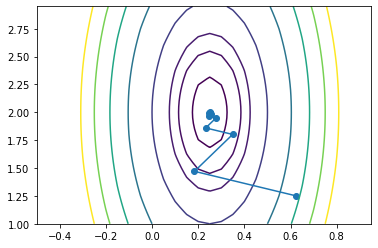

In [5]:
X = np.arange(-.5,1,0.05)
Y = np.arange(1,3,0.05)
X, Y = np.meshgrid(X,Y)

def costFunction(A,x,b):
    if type(x) == list:
        x = np.array(x)
    return (A.dot(x)-b).transpose().dot(A.dot(x)-b)

Z = np.array( [costFunction(A,z,b) for z in zip (np.ravel(X), np.ravel(Y))]).reshape(X.shape)

fig, ax = plt.subplots()

ax.contour(X,Y,Z, levels=[0.1, 0.3, 0.5, 1, 2, 3, 4, 5])
ax.scatter(x1,x2)
ax.plot(x1,x2)

## Fixed-step gradient descent

In [6]:
x = sD_minimize(A,b,alpha=.1,TOL=1e-3)

In [7]:
x1 = [z[0] for z in x]
x2 = [z[1] for z in x]

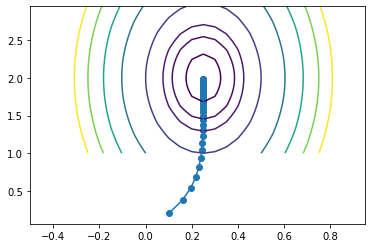

In [8]:
X = np.arange(-.5,1,0.05)
Y = np.arange(1,3,0.05)
X, Y = np.meshgrid(X,Y)

def costFunction(A,x,b):
    if type(x) == list:
        x = np.array(x)
    return (A.dot(x)-b).transpose().dot(A.dot(x)-b)

Z = np.array( [costFunction(A,z,b) for z in zip (np.ravel(X), np.ravel(Y))]).reshape(X.shape)

fig, ax = plt.subplots()

ax.contour(X,Y,Z, levels=[0.1, 0.3, 0.5, 1, 2, 3, 4, 5])
ax.scatter(x1,x2)
ax.plot(x1,x2)

## Inexact line search

In [9]:
def f(x):
    return (x[0]-3)**2 + 4*x[1]**2 + 2*x[0]*(x[1]+1)

def grad_f(x):
    return np.array([2*(x[0]-3) + 2*(x[1]+1), 2*x[0]+8*x[1]])

In [10]:
x_lS = lS_minimize(f, grad_f, dim=2, c=1e-4)

The value of alpha is: 0.5
The value of alpha is: 0.125
The value of alpha is: 0.5
The value of alpha is: 0.125
The value of alpha is: 0.5
The value of alpha is: 0.125
The value of alpha is: 0.5
The value of alpha is: 0.125
The value of alpha is: 0.5
The value of alpha is: 0.125
The value of alpha is: 0.5
The value of alpha is: 0.125
The value of alpha is: 0.5
The value of alpha is: 0.125
The value of alpha is: 0.5
The value of alpha is: 0.125
The value of alpha is: 0.5
The value of alpha is: 0.125
The value of alpha is: 0.5
The value of alpha is: 0.125


In [11]:
x_lS[-1]

array([ 2.66666412, -0.66666603])